# **Bioinformatics Project - Computational Drug Discovery [Part 5] Comparing Regressors**


In Part 5, we will be comparing several ML algorithms for build regression models of acetylcholinesterase inhibitors.



## **1. Import libraries**

In [1]:
# ! pip install lazypredict

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

## **2. Load the data set**


In [3]:
df = pd.read_csv('Data/06_bioactivity_data_3class_pIC50_pubchem_fp.csv')
df=df.dropna()

In [4]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

## **3. Data pre-processing**

In [5]:
# Examine X dimension
X.shape

(121, 881)

In [6]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(121, 150)

In [7]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## **4. Compare ML algorithms**

In [8]:
# Defines and builds the lazyclassifier

clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [00:47<00:00,  1.14s/it]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [00:43<00:00,  1.05s/it]


In [9]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,81221603526818835873356087896847176458453880143...,-4702303362078985540845483065554675687287113520...,19506260225966493013114880.00,0.51
LarsCV,81141698863036933508709503465746025469576820555...,-4697677302596874791800419592279667582230453362...,19496662873610344674099200.00,1.40
KernelRidge,138.86,-78.81,8.04,0.05
QuantileRegressor,2.82,-0.06,0.92,0.31
PassiveAggressiveRegressor,2.73,-0.00,0.90,0.03
Lasso,2.73,0.00,0.90,0.05
LassoLars,2.73,0.00,0.90,0.04
ElasticNet,2.73,0.00,0.90,0.04
DummyRegressor,2.73,0.00,0.90,0.06


In [10]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,16590979840437518825612692385435952217474962020...,-8710264416229698403475695502689499037490136332...,7456493619912932553490576100045094912.00,0.18
LarsCV,16590451405608848725357766617420191765580676337...,-8709986987944646208523001012813677060508797397...,7456374871582754787383714147052027904.00,0.80
TransformedTargetRegressor,2740269382808775413465088.00,-14386414259746070652256256.00,3030367237053.44,0.04
LinearRegression,2740269382808775413465088.00,-14386414259746070652256256.00,3030367237053.44,0.07
KernelRidge,20.62,-101.99,8.11,0.02
GaussianProcessRegressor,13.55,-64.91,6.49,0.04
ExtraTreeRegressor,1.75,-2.93,1.58,0.09
ExtraTreesRegressor,1.60,-2.15,1.42,0.26
DecisionTreeRegressor,1.55,-1.87,1.35,0.03


## **5. Data visualization of model performance**

[(0.0, 1.0)]

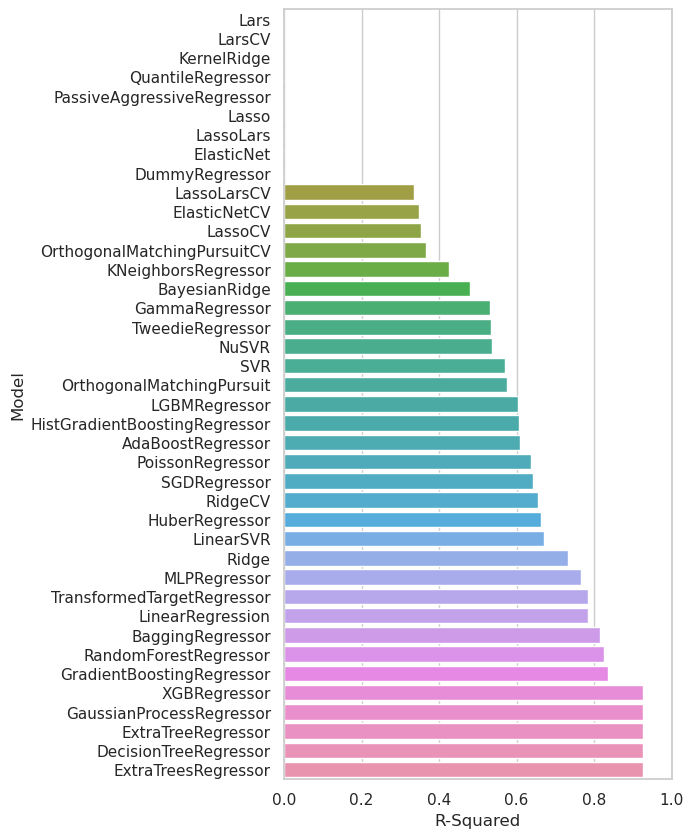

In [11]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

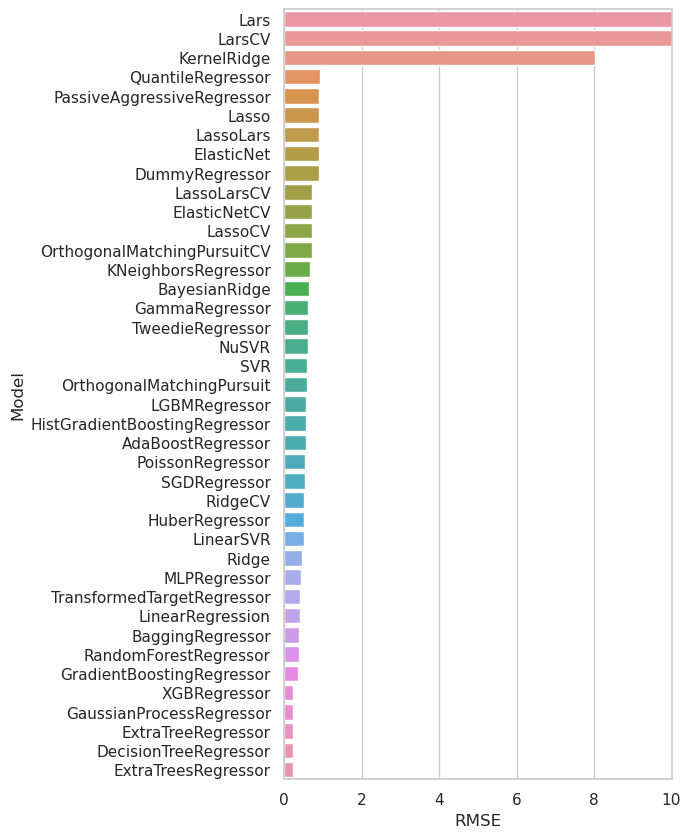

In [12]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

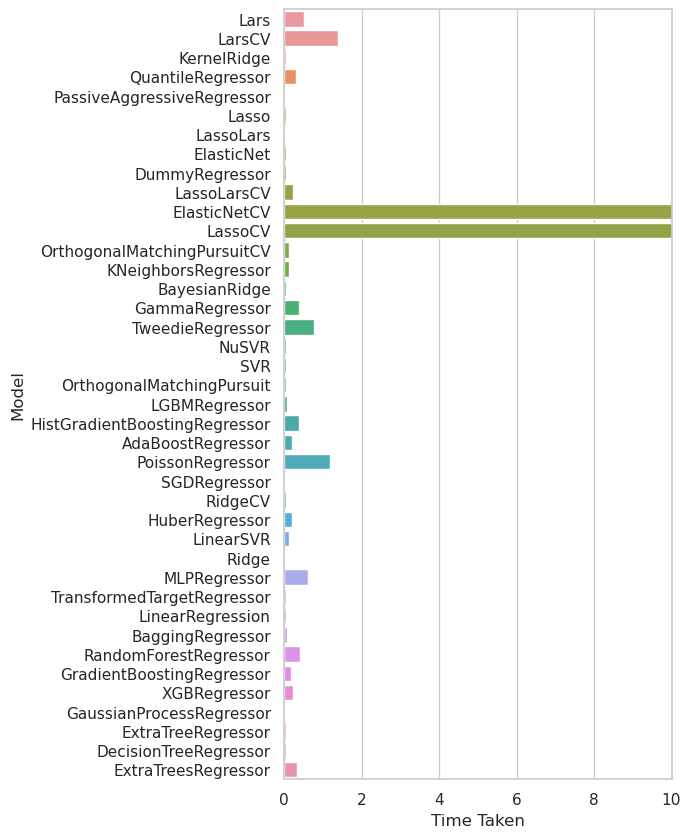

In [13]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))